In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
import seaborn as sns
from datetime import datetime

In [ ]:
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

import yfinance as yf
df = yf.download('CIBEY', start, end)
df.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,2.992021,3.025266,2.992021,3.025266,2.825756,20154
2017-10-31,2.925532,3.065160,2.925532,3.058511,2.856809,90090
2017-11-01,3.085106,3.125000,3.058511,3.125000,2.918913,71290
2017-11-02,2.992021,3.091755,2.992021,3.058511,2.856809,49331
2017-11-03,3.045213,3.091755,2.958777,3.091755,2.887860,49030
2017-11-06,3.025266,3.051862,3.011968,3.051862,2.850598,28576
2017-11-07,3.018617,3.051862,3.011968,3.051862,2.850598,26771
2017-11-08,2.925532,3.058511,2.925532,3.058511,2.856809,44368
2017-11-09,3.011968,3.065160,2.998670,3.065160,2.863019,36698


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-10-30 to 2022-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df.drop(['Open' , 'High' , 'Low' , 'Adj Close' , 'Volume'], axis = 1, inplace = True)

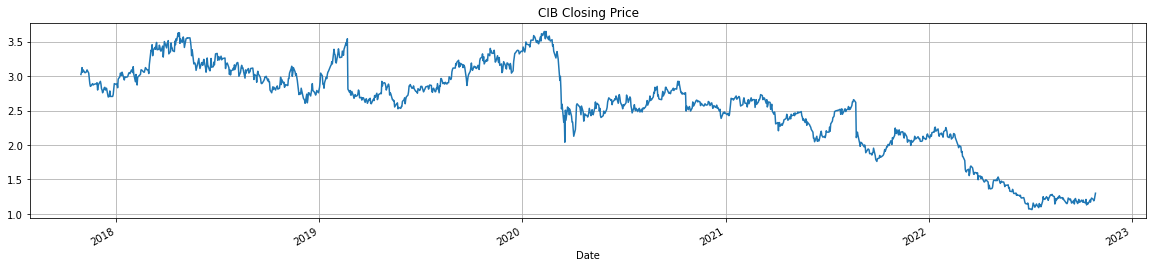

In [ ]:
df['Close'].plot(grid = True ,figsize = (20,4),title ="CIB Closing Price")
plt.show()

In [ ]:
df = df.asfreq('b')

In [ ]:
df.head(20)

,Close
Date,
2017-10-30,3.025266
2017-10-31,3.058511
2017-11-01,3.125000
2017-11-02,3.058511
2017-11-03,3.091755
2017-11-06,3.051862
2017-11-07,3.051862
2017-11-08,3.058511
2017-11-09,3.065160


As you can see, the 15th of January 2018 has not data ! as it was a holiday of Martin Luther King Day

In [ ]:
df = df.fillna(method="bfill")

In [ ]:
df.head(20)

,Close
Date,
2017-10-30,3.025266
2017-10-31,3.058511
2017-11-01,3.125000
2017-11-02,3.058511
2017-11-03,3.091755
2017-11-06,3.051862
2017-11-07,3.051862
2017-11-08,3.058511
2017-11-09,3.065160


In [ ]:
size = int(len(df)*0.75)
df, df_test = df.iloc[:size], df.iloc[size:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 978 entries, 2017-10-30 to 2021-07-28
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   978 non-null    float64
dtypes: float64(1)
memory usage: 15.3 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2021-07-29 to 2022-10-28
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   327 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB





## Covariance stationarity

In [ ]:
adf_result = sts.adfuller(df.Close)

print(f'T Statistic = {adf_result[0]}')
print()
print(f'P-Value = {adf_result[1]}')

print("\ncritical values:\n")
for key , value in adf_result[4].items():
    print(f'{key} = {value}')

T Statistic = -2.5731338035421127

P-Value = 0.09867806126993811

critical values:

1% = -3.4370885772879083
5% = -2.8645150193044464
10% = -2.5683540564723377


    Our Data maybe Extracted from a non-stationary process

## Using Returns to solve the stationary issue

Text(0, 0.5, 'Return')

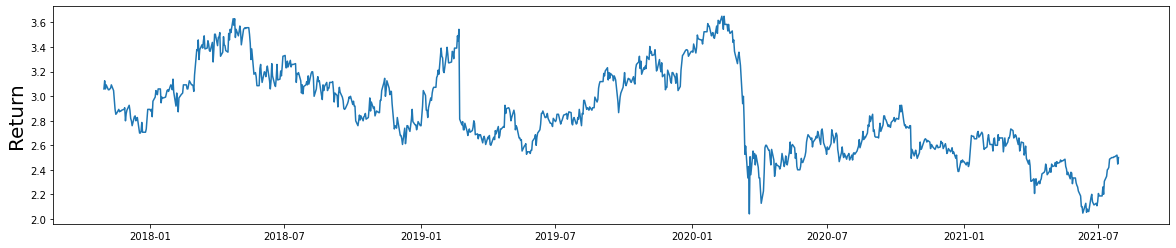

In [ ]:
df['Returns'] = df.Close
df= df.iloc[1:]

plt.figure(figsize=(20,4))
plt.plot(df['Returns'])
plt.ylabel('Return', fontsize=20)

In [ ]:
adf_result = sts.adfuller(df.Returns)

print(f'T Statistic = {adf_result[0]}')
print()
print(f'P Value = {adf_result[1]}')

print("\nCritical Values:\n")
for key , value in adf_result[4].items():
    print(f'{key} = {value}')

T Statistic = -2.5634906908111774

P Value = 0.10078018207725259

Critical Values:

1% = -3.4370955284183404
5% = -2.8645180847192755
10% = -2.568355689215736


## Seasonality
#### Resid are The difference between true values and predictions for any period

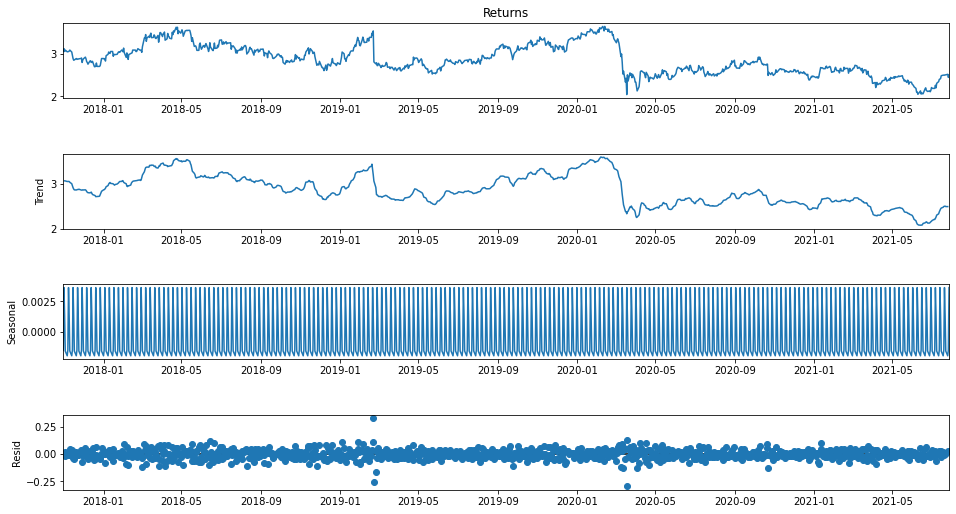

In [ ]:
result = seasonal_decompose(df.Returns, model='additive')
fig = result.plot()
fig.set_size_inches(15, 8)
plt.show()

In [ ]:
df

,Close,Returns
Date,,
2017-10-31,3.058511,3.058511
2017-11-01,3.125000,3.125000
2017-11-02,3.058511,3.058511
2017-11-03,3.091755,3.091755
2017-11-06,3.051862,3.051862
...,...,...
2021-07-22,2.506649,2.506649
2021-07-23,2.506649,2.506649
2021-07-26,2.519947,2.519947


    There are NO Seasonality in the Data

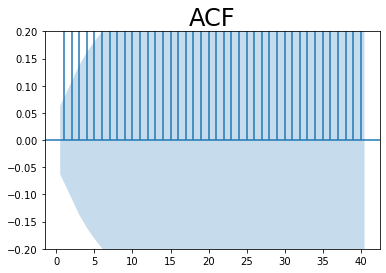

In [ ]:
sgt.plot_acf(df.Returns, lags = 40, zero = False)
plt.title("ACF", size = 24)
plt.ylim(-0.2,0.2)
plt.show()

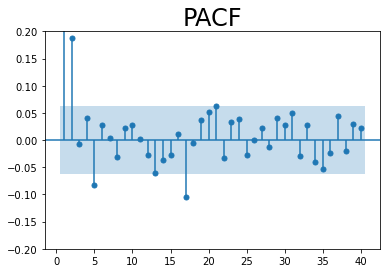

In [ ]:
fig = sgt.plot_pacf(df.Returns, lags = 40, zero = False ,method='ols')
plt.title("PACF", size = 24)
plt.ylim(-0.2,0.2)
plt.show()

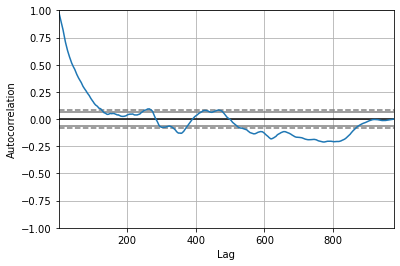

In [ ]:
autocorrelation_plot(df.Close)
# plt.ylim(-0.35,0.35)
# plt.xlim(60,80)
plt.show()

## Log-Likelihood Ratio (LLR) test

In [ ]:
def LLR_test (mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## AR MODEL

### LAG 1

In [ ]:
Model_AR_1 = ARIMA(df.Returns, order=(1,0,0))
Results_Model_AR_1 = Model_AR_1.fit()
print(Results_Model_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  977
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1231.096
Date:                Sat, 29 Oct 2022   AIC                          -2456.192
Time:                        20:13:32   BIC                          -2441.539
Sample:                    10-31-2017   HQIC                         -2450.616
                         - 07-28-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8644      0.119     24.032      0.000       2.631       3.098
ar.L1          0.9810      0.006    167.806      0.000       0.969       0.992
sigma2         0.0047   8.75e-05     53.634      0.0

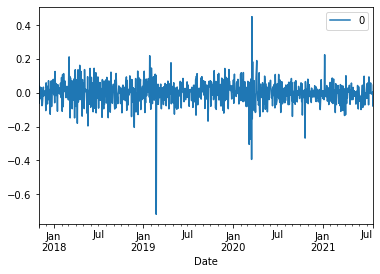

In [ ]:
DataFrame(Results_Model_AR_1.resid).plot()
plt.show(close=None, block=None)

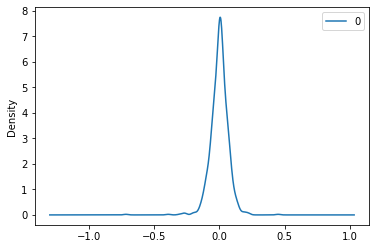

In [ ]:
DataFrame(Results_Model_AR_1.resid).plot(kind="kde")
plt.show()

In [ ]:
DataFrame(Results_Model_AR_1.resid).describe()

,0
count,977.000000
mean,-0.000366
std,0.068820
min,-0.718440
25%,-0.036134
50%,0.003697
75%,0.036941
max,0.449745


### LAG 2

In [ ]:
Model_AR_2 = ARIMA(df.Returns, order=(2,5,0))
Results_Model_AR_2 = Model_AR_2.fit()
print(Results_Model_AR_2.summary())
print("\n\nLLR Test : " + str(LLR_test(Model_AR_1,Model_AR_2)))

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  977
Model:                 ARIMA(2, 5, 0)   Log Likelihood                -137.139
Date:                Sat, 29 Oct 2022   AIC                            280.279
Time:                        20:13:34   BIC                            294.917
Sample:                    10-31-2017   HQIC                           285.850
                         - 07-28-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3808      0.015    -89.380      0.000      -1.411      -1.351
ar.L2         -0.6427      0.017    -37.342      0.000      -0.676      -0.609
sigma2         0.0775      0.002     37.451      0.0

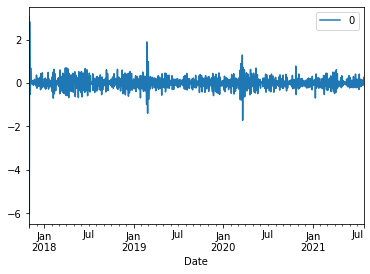

In [ ]:
DataFrame(Results_Model_AR_2.resid).plot()
plt.show(close=None, block=None)

In [ ]:
DataFrame(Results_Model_AR_2.resid).describe()

,0
count,977.000000
mean,0.000141
std,0.364883
min,-6.050533
25%,-0.161535
50%,-0.003298
75%,0.168178
max,3.058511


### LAG 3

In [ ]:
Model_AR_3 = ARIMA(df.Returns, order=(3,0,0))
Results_Model_AR_3 = Model_AR_3.fit()
print(Results_Model_AR_3.summary())
print("\n\nLLR Test : " + str(LLR_test(Model_AR_2,Model_AR_3)))

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  977
Model:                 ARIMA(3, 0, 0)   Log Likelihood                1248.448
Date:                Sat, 29 Oct 2022   AIC                          -2486.897
Time:                        20:13:36   BIC                          -2462.474
Sample:                    10-31-2017   HQIC                         -2477.604
                         - 07-28-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8644      0.148     19.364      0.000       2.575       3.154
ar.L1          0.7999      0.020     39.521      0.000       0.760       0.840
ar.L2          0.1926      0.026      7.306      0.0

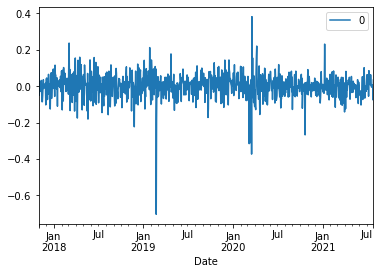

In [ ]:
DataFrame(Results_Model_AR_3.resid).plot()
plt.show(close=None, block=None)

In [ ]:
DataFrame(Results_Model_AR_3.resid).describe()

,0
count,977.000000
mean,-0.000478
std,0.067616
min,-0.703376
25%,-0.031912
50%,0.002703
75%,0.035755
max,0.380764


In [ ]:
DataFrame(Results_Model_AR_1.resid).describe()

,0
count,977.000000
mean,-0.000366
std,0.068820
min,-0.718440
25%,-0.036134
50%,0.003697
75%,0.036941
max,0.449745


In [ ]:
DataFrame(Results_Model_AR_2.resid).describe()

,0
count,977.000000
mean,0.000141
std,0.364883
min,-6.050533
25%,-0.161535
50%,-0.003298
75%,0.168178
max,3.058511


In [ ]:
DataFrame(Results_Model_AR_3.resid).describe()

,0
count,977.000000
mean,-0.000478
std,0.067616
min,-0.703376
25%,-0.031912
50%,0.002703
75%,0.035755
max,0.380764


In [ ]:
sts.adfuller(Results_Model_AR_3.resid)

(-14.710252142676458,
 2.8549519325684327e-27,
 3,
 973,
 {'1%': -3.4370885772879083,
  '5%': -2.8645150193044464,
  '10%': -2.5683540564723377},
 -2425.2768646564045)

   The P Value which is equal to zero fits our expectations !

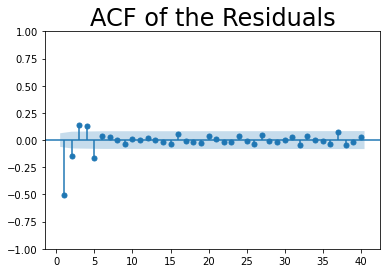

In [ ]:
sgt.plot_acf(Results_Model_AR_2.resid, lags = 40, zero = False)
plt.title("ACF of the Residuals", size = 24)
# plt.ylim(-0.15,0.15)
plt.show()

    We can see the the majority of the confessions fall within the blue region,  which fits the can you statistics of white noise

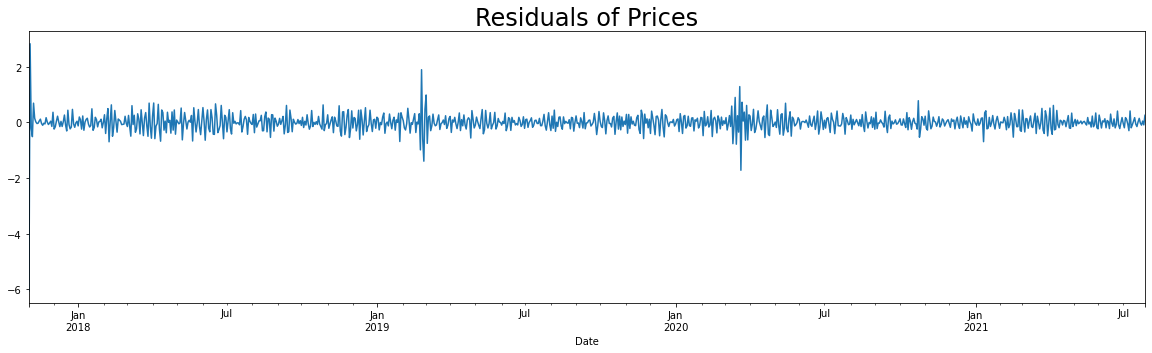

In [ ]:
Results_Model_AR_2.resid[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
# plt.ylim(-0.4,0.4)
plt.show()

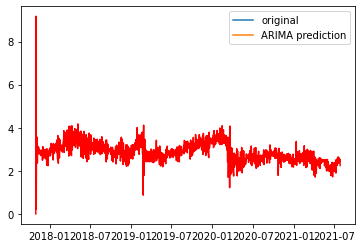

In [ ]:
ARIMA_prediction = Results_Model_AR_2.fittedvalues
plt.plot(df,label='original')
plt.plot(ARIMA_prediction,color='red',label='ARIMA prediction')
plt.legend(labels=['original','ARIMA prediction'])
plt.show()

In [ ]:
import pmdarima as pm
pm.auto_arima(df.Returns,start_p=0,start_q=0,max_p=3,max_q=3,trace=True)

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
#cross validation
from pmdarima import model_selection
model1 = pm.ARIMA(order=(1, 0, 0))
model2 = pm.ARIMA(order=(1, 1, 0))
model3 = pm.ARIMA(order=(1, 1, 1),
                  suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=100, step=24, h=1)

model1_cv_scores = model_selection.cross_val_score(
    model1, df.Returns, scoring='smape', cv=cv, verbose=2)

model2_cv_scores = model_selection.cross_val_score(
    model2, df.Returns, scoring='smape', cv=cv, verbose=2)

model3_cv_scores = model_selection.cross_val_score(
    model2, df.Returns, scoring='smape', cv=cv, verbose=2)

print("Model 1 CV scores: {}".format(model1_cv_scores.tolist()))
print("Model 2 CV scores: {}".format(model2_cv_scores.tolist()))
print("Model 3 CV scores: {}".format(model3_cv_scores.tolist()))

# Pick based on which has a lower mean error rate
m1_average_error = np.average(model1_cv_scores)
m2_average_error = np.average(model2_cv_scores)
m3_average_error = np.average(model3_cv_scores)
errors = [m1_average_error, m2_average_error,m3_average_error]
models = [model1, model2,model3]

In [ ]:
# print out the answer
better_index = np.argmin(errors)  # type: int
print("Lowest average SMAPE: {} (model{})".format(
    errors[better_index], better_index + 1))
print("Best model: {}".format(models[better_index]))

In [ ]:
#Modeling
# Build Model
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(df.Close, order=(2,2,0))
fitted = model.fit()
print(fitted.summary())
fitted.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],linewidth=0.8)
residuals.plot(kind='kde', title='Density', ax=ax[1],linewidth=0.8)
plt.show()

In [ ]:
predictions = fitted.predict()
print(predictions)

In [ ]:
plt.figure(figsize=(25,8))
# plt.plot(df.Close, label="actual")
# plt.plot(df, label="train")
# plt.plot(df_test, label="test")
plt.plot(predictions, label="ARIMA prediction")
plt.ylabel('Sales', fontsize=16)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions-df.Returns)**2)/len(df.Returns)))
plt.legend()

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(df_test, label="test")
plt.plot(predictions, label="ARIMA prediction")
plt.ylabel('Sales', fontsize=16)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions-df.Close)**2)/len(df.Close)))
plt.legend()